# Using the `AlecOODShapeData` Class

The `AlecOODShapeData` class represents a major north star metric in how we measure our models. In Alec-OOD mode, we train the model on certain combinations of shape color and type and certain numbers of objects, then evalaute its ability to extrapolate to new combinations of shape color and type and new numbers of objects. Unlike the standard OOD mode, we use Alec mode, meaning each scene can be reliably expressed across just three dimensions (color, type, count) instead of representing a list of objects.

This notebook demonstrates starting places for using the `AlecOODShapeData` class.

---

## Imports

In [1]:
!wget -O shapedata.py https://raw.githubusercontent.com/interactive-intelligence/emergent-lang/main/shapedata.py
import shapedata
import importlib
importlib.reload(shapedata)

import shapedata
import random
import numpy as np

--2022-05-03 06:10:16--  https://raw.githubusercontent.com/interactive-intelligence/emergent-lang/main/shapedata.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15734 (15K) [text/plain]
Saving to: ‘shapedata.py’

shapedata.py        100%[===================>]  15.37K  --.-KB/s    in 0s      

2022-05-03 06:10:16 (52.4 MB/s) - ‘shapedata.py’ saved [15734/15734]



---

# Instantiating the Dataset

In [2]:
from shapedata import AlecOODShapeData

The `AlecOODShapeData` class has three new parameters - `exclude_shapes`, `id_object_counts`, and `ood_object_counts`. From the source code:

```
exclude_shapes: a set of tuples in form (shape_name, color). For instance,
    {('square', (255, 0, 0)), ('circle', (0, 255, 0))} excludes red squares
    and green circles from the in-distribution training dataset. The excluded
    shapes constitute the out-of-distribution dataset.
id_object_counts: valid object counts for in-distribution training dataset.
    For instance, [1, 2, 3] specifies that there are either 1, 2, or 3 objects
    in each in-distribution scene.
ood_object_counts: valid object counts for out-of-distribution dataset.
    For instance, [4, 5] specifies that there are either 4 or 5 objects in each
    out of distribution scene. This can be set to be a subset of id_object_counts
    if not focusing on extrapolating to new object counts.
```

In [3]:
data = AlecOODShapeData(# boring old parameters
                        im_size=64,
                        batch_size=128,
                        outline=(255, 255,255),
                        
                        # exciting new stuff!
                        exclude_shapes={('square', (255, 0, 0))}, 
                        id_object_counts=[1, 2, 3],
                        ood_object_counts=[4, 5])

You can show the in-distribution dataset with `shapedata.demo_dataset()`.

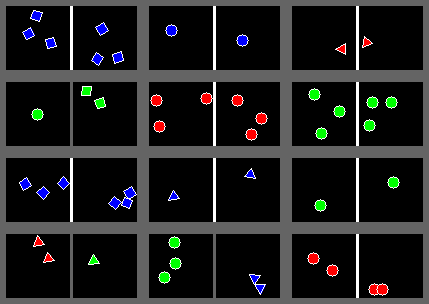

In [4]:
shapedata.demo_dataset(data)

To show the out of distribution dataset, set `ood=True`. This is an extra parameter I added in that Yegor will probably hate which applies only when visualizing an `AlecOODShapeData` class.

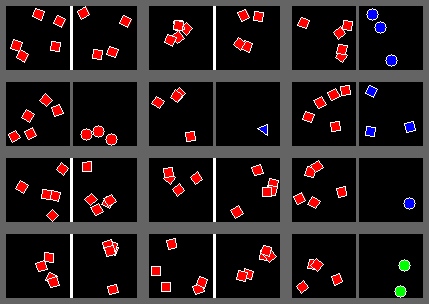

In [5]:
shapedata.demo_dataset(data, ood=True)

---

## Using the Dataset

Generating the in-distribution dataset is the same as before.

In [6]:
(x1, x1_shapes), (x2, x2_shapes), y = data.create_batch()

To generate the out-of-distribution dataset for testing, use `.create_batch_ood()`. When the label is 1 (i.e. they are the same), this generates two OOD sets of shapes and creates two scenes. When the label is 0, the first returned image is an OOD set and the other is an ID set.

In [7]:
(x1, x1_shapes), (x2, x2_shapes), y = data.create_batch_ood()

In cases where the label is 0, it may be easy to differentiate images simply by color. You can pass the `color_spec` argument into `create_batch_ood`, which restricts the other ID-generated image to the set of specified colors. Since in this example we excluded red squares, we would want to ensure that other ID images also feature red shapes.

In [8]:
(x1, x1_shapes), (x2, x2_shapes), y = data.create_batch_ood(color_spec=[(255,0,0)])

I also sneaked in a class-specific `color_spec` argument into `demo_dataset`.

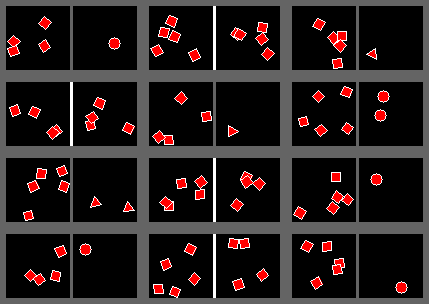

In [9]:
shapedata.demo_dataset(data, ood=True, color_spec=[(255, 0, 0)])

Happy OOD evaluating!